# Cloud Cover Reduction Plots

We are really lucking to have the ICON restart files. Fortunately, they contain much more additional data that are very helpful, e.g. short- and longwave heating profile.

The profiles will be combined with cloud cover information stroed in standard output.

## Import Libraries

In [20]:
%matplotlib inline

import sys, os
import datetime
import numpy as np
import xarray as xr
import importlib
import scipy.ndimage


import pylab as plt
plt.rcParams['figure.figsize'] = (12,8)
import seaborn as sns
sns.set_context( 'talk' )

import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%H')

# import nawdex_analysis.io.tools

In [21]:
tools_dir = '%s/proj/2017-11_icon-de-lem-analysis/tools' % os.environ['HOME']

import sys
sys.path.append(tools_dir)

In [22]:
import domain_budgets, input_regrid5km
importlib.reload( input_regrid5km )

<module 'input_regrid5km' from '/pf/b/b380352/proj/2017-11_icon-de-lem-analysis/tools/input_regrid5km.py'>

In [23]:
title_kws = dict( fontsize = 'large', fontweight = 'bold', pad = 10)


## Open Files

### 2dim Fields

In [24]:
t = datetime.datetime( 2013, 5, 2, 11, 0)
t0 = t

In [25]:
dset = input_regrid5km.input_2dfields(t, filter_time = False).squeeze()

/pf/b/b380352/data/icon-lem/20130502_CCN_rad/DATA/2d_cloud_*DOM01*20130502T1100*_regrid5km.nc
/pf/b/b380352/data/icon-lem/20130502_semi_direct_effect/DATA/2d_cloud_*DOM01*20130502T1100*_regrid5km.nc
/pf/b/b380352/data/icon-lem/20130502_CCN_rad/DATA/2d_cloud_*DOM02*20130502T1100*_regrid5km.nc
/pf/b/b380352/data/icon-lem/20130502_semi_direct_effect/DATA/2d_cloud_*DOM02*20130502T1100*_regrid5km.nc


/pf/b/b380352/proj/2017-11_icon-de-lem-analysis/tools/input_regrid5km.py:70: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  d = xr.open_mfdataset( flist, chunks = {'time':1} ).squeeze()
/pf/b/b380352/.conda/python37/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,


/pf/b/b380352/data/icon-lem/20130502_CCN_rad/DATA/2d_rad_*DOM01*20130502T1100*_regrid5km.nc
/pf/b/b380352/data/icon-lem/20130502_semi_direct_effect/DATA/2d_rad_*DOM01*20130502T1100*_regrid5km.nc
/pf/b/b380352/data/icon-lem/20130502_CCN_rad/DATA/2d_rad_*DOM02*20130502T1100*_regrid5km.nc
/pf/b/b380352/data/icon-lem/20130502_semi_direct_effect/DATA/2d_rad_*DOM02*20130502T1100*_regrid5km.nc


/pf/b/b380352/proj/2017-11_icon-de-lem-analysis/tools/input_regrid5km.py:70: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  d = xr.open_mfdataset( flist, chunks = {'time':1} ).squeeze()
/pf/b/b380352/.conda/python37/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,


/pf/b/b380352/data/icon-lem/20130502_CCN_rad/DATA/2d_surface_*DOM01*20130502T1100*_regrid5km.nc
/pf/b/b380352/data/icon-lem/20130502_semi_direct_effect/DATA/2d_surface_*DOM01*20130502T1100*_regrid5km.nc
/pf/b/b380352/data/icon-lem/20130502_CCN_rad/DATA/2d_surface_*DOM02*20130502T1100*_regrid5km.nc
/pf/b/b380352/data/icon-lem/20130502_semi_direct_effect/DATA/2d_surface_*DOM02*20130502T1100*_regrid5km.nc


/pf/b/b380352/proj/2017-11_icon-de-lem-analysis/tools/input_regrid5km.py:70: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  d = xr.open_mfdataset( flist, chunks = {'time':1} ).squeeze()
/pf/b/b380352/.conda/python37/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,


### Time Series

In [26]:
fdir = '%s/icon-lem/aggregates' % (os.environ['LOCAL_DATA_PATH'],  )
fname = '%s/domain_average_resampled5min.nc' % fdir
tseries = xr.open_dataset( fname ).isel( time = slice(1, 288))

In [27]:
noon = tseries.time.sel(time = '20130502T1100').data
noon

array('2013-05-02T11:00:00.000000000', dtype='datetime64[ns]')

In [28]:
sw_down = tseries['sod_t'].mean(['mode', 'dom'])
sw_down_dayonly = sw_down.where(sw_down > 1.).dropna(dim = 'time')

sunrise = sw_down_dayonly.time.isel( time = 0).data
sunset = sw_down_dayonly.time.isel( time = -1).data

sunrise

/pf/b/b380352/.conda/python37/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


array('2013-05-02T03:40:00.000000000', dtype='datetime64[ns]')

## Plotting Time Series

### A Function

In [29]:
def diffplotter( dset, vname, relative = False, flip_axis = True, despine = True ):
    
    dset = input_regrid5km.get_difference( dset )

    d = dset.sel(dom = 'DOM01', mode = 'difference')[vname]
    d = d.dropna('time')
    d.plot(lw = 3, label = '625m')

    d = dset.sel(dom = 'DOM02', mode = 'difference')[vname]
    d = d.dropna('time')
    d.attrs['long_name'] = '$\Delta$(%s)' % d.attrs['long_name']

    d.plot(lw = 3, label = '312m')


    plt.gca().xaxis.set_major_formatter(myFmt)
    # plt.title(c1.long_name, fontweight = 'bold')
    #plt.ylabel('%s / ( %s )' % (variable_name, units))
    plt.xlabel('hours since 2013-05-02 00z', labelpad = 15 )
    plt.axhline(0, color = 'gray', alpha = 0.3, lw = 5)
    #plt.figtext(0.25, 0.7, 'ave = %.f %s' % (c1.mean(), c1.units), bbox = dict( color = 'white', alpha = 0.7) )

    if despine:
        sns.despine()
    return

In [30]:
tseries['clcl'].attrs['long_name'] = 'low-level cloud cover'
tseries['sob_s'].attrs['units'] = 'W m${}^{-2}$'

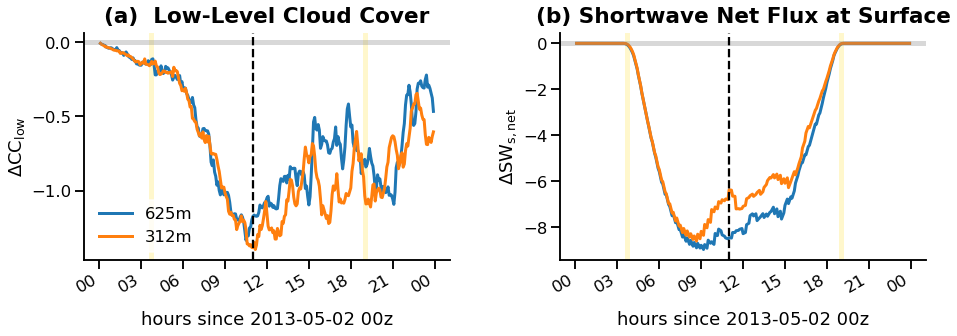

In [31]:
fig, axs = plt.subplots( ncols = 2, figsize = (18, 5) )
plt.subplots_adjust( wspace = 0.3, left = 0.2, right = 0.85, bottom = 0.25 )
plt.sca( axs[0] )
diffplotter(tseries, 'clcl')

plt.title(r'(a)  Low-Level Cloud Cover', **title_kws)
plt.ylabel(r'$\Delta\mathrm{CC_{low}}$', )
plt.yticks([0, -0.5, -1.]);


plt.axvline(sunrise, color = 'gold', lw = 5, alpha = 0.2, zorder = -10)
plt.axvline(sunset, color = 'gold', lw = 5, alpha = 0.2, zorder = -10)

plt.axvline(noon, color = 'k', ls = '--')
plt.legend( edgecolor = 'white', facecolor='white')

plt.sca( axs[1] )
diffplotter(tseries, 'sob_s')
plt.title(r'(b) Shortwave Net Flux at Surface', **title_kws)
plt.ylabel(r'$\Delta\mathrm{SW_{ s, \mathrm{net} }}$')

plt.axvline(sunrise, color = 'gold', lw = 5, alpha = 0.2, zorder = -10)
plt.axvline(sunset, color = 'gold', lw = 5, alpha = 0.2, zorder = -10)
plt.axvline(noon, color = 'k', ls = '--')

plt.savefig( '../pics/tseries_cc_sob_s.png', dpi = 300. )

/pf/b/b380352/.conda/python37/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


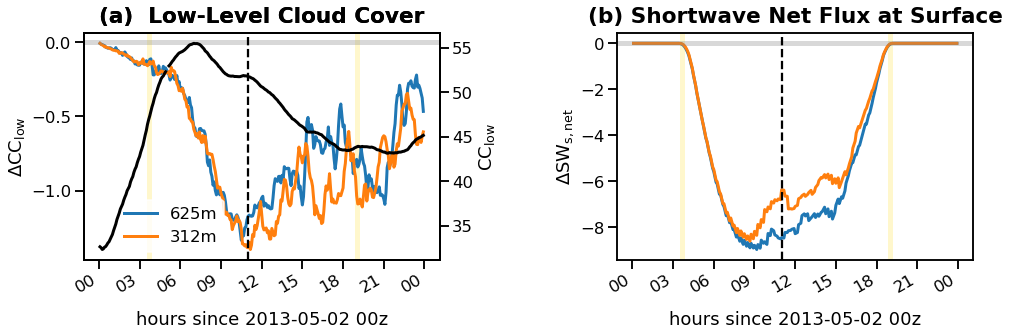

In [32]:
fig, axs = plt.subplots( ncols = 2, figsize = (19, 5) )
plt.subplots_adjust( wspace = 0.5, left = 0.2, right = 0.85, bottom = 0.25 )
plt.sca( axs[0] )

a2 = axs[0].twinx()
tseries['clcl'].mean('dom').sel(mode = 'scattering').plot( ax = a2, lw = 3, color = 'k' )

plt.sca( axs[0])
diffplotter(tseries, 'clcl', despine = False)

for a in [axs[0], a2]:
    a.set_title(r'(a)  Low-Level Cloud Cover', **title_kws)
    
axs[0].set_ylabel(r'$\Delta\mathrm{CC_{low}}$', )
a2.set_ylabel(r'$\mathrm{CC_{low}}$', )


plt.yticks([0, -0.5, -1.]);


plt.axvline(sunrise, color = 'gold', lw = 5, alpha = 0.2, zorder = -10)
plt.axvline(sunset, color = 'gold', lw = 5, alpha = 0.2, zorder = -10)

plt.axvline(noon, color = 'k', ls = '--')
plt.legend( loc = 'lower left', edgecolor = 'white', facecolor='white', bbox_to_anchor = (0.07, 0.))

plt.sca( axs[1] )
diffplotter(tseries, 'sob_s', despine = False)
plt.title(r'(b) Shortwave Net Flux at Surface', **title_kws)
plt.ylabel(r'$\Delta\mathrm{SW_{ s, \mathrm{net} }}$')

plt.axvline(sunrise, color = 'gold', lw = 5, alpha = 0.2, zorder = -10)
plt.axvline(sunset, color = 'gold', lw = 5, alpha = 0.2, zorder = -10)
plt.axvline(noon, color = 'k', ls = '--')

plt.savefig( '../pics/tseries_cc_sob_s_with_refcc.png', dpi = 300. )

In [33]:
plt.legend?

## Plotting 2dim Fields

### A Function

In [34]:
def plot_ref_or_diff(ax, dset, vname, cmap_inverse = False, cmap = None, diff_vmax = None, 
                      dom = 'DOM02', sigma_smooth = 2., plot_ref = True,
                      relative = False,  plot_clcl_contour = True, reference_mode = 'scattering',
                      **ref_plot_kwargs):
    
    '''
    Plots maps of reference and differences for a chosen field.
    
    
    Parameters
    ----------
    dset : xarray.Dataset
        data set which holds the different fields
        
    vname : str
        name of variable, should be in `dset.data_vars`
        
    cmap_inverse : {True, False}, optional
        if standard reference map is reversed and `cmap == None`
        
    cmap : plt.cm object, optional
        a colormap for the reference field
        
        if `None`: cmap is default map (typically `plt.cm.viridis`)
        
    diff_vmax : float, optional
        vmax option set for diference field
        
    dom : {'DOM01', 'DOM02'}, optional
        which domain to be used 
        
        * 'DOM01': 625m grid spacing
        * 'DOM02': 312m grid spacing
        
    sigma_smooth : float, optional
        width of Gaussian filter applied to the difference field
        
    relative : {True, False}, optional
        if relative difference is plotted
        
        relative difference is difference divided by domain mean in %
        
    plot_clcl_contour : {True, False}, optional
        if contours of the low-level cloud cover are plotted
        
    reference_mode : {'scattering', 'absorbing'}, optional
        name of experiment chosen as reference
        
        
    Returns
    -------
    None
    '''
    
    if cmap is None:
        if cmap_inverse:
            cmap = plt.cm.viridis_r
        else:
            cmap = plt.cm.viridis
    
    if diff_vmax is None:
        vmin = None
        vmax = None
    else:
        vmin = -diff_vmax
        vmax = diff_vmax
    
    d = dset[vname].copy()
    if relative:
        dd = 100. * d.sel(mode = 'difference', dom = dom) / d.sel(
                mode = reference_mode, dom = dom ).mean(['lon', 'lat'])
        
        dtitle = 'relative difference'
    else:
        dd = d.sel(mode = 'difference', dom = dom)
        dtitle = 'difference'
        
    if sigma_smooth > 0:
        dd = xr.apply_ufunc( scipy.ndimage.gaussian_filter, dd.load(), sigma_smooth, keep_attrs = True )

    ref_kws = dict( mode = reference_mode, dom = dom )

    cb = {'orientation':'horizontal', 'shrink':0.9}

    plt.sca( ax )

    if plot_ref:
        p = d.sel(**ref_kws).plot(cmap = cmap, cbar_kwargs = cb, **ref_plot_kwargs )
        return p
    else:
        dd.attrs['long_name'] = '$\Delta$(%s)' % dd.attrs['long_name']
        dd.plot.contourf(cmap = plt.cm.RdBu_r, levels = 21, cbar_kwargs = cb, 
                                                            vmin = vmin, vmax = vmax)
    
        if plot_clcl_contour:
            dset['clcl'].sel( **ref_kws ).plot.contour( levels = [ 95],  cmap = plt.cm.gray)


In [35]:
dset['sod_s'] = dset['sodifd_s'] + dset['sodird_s']

In [36]:
dset.lon.attrs['units'] = '°E'
dset.lat.attrs['units'] = '°N'

dset['clcl'].attrs['long_name'] = 'low-level cloud cover'
dset['sob_s'].attrs['units'] = 'W m${}^{-2}$'

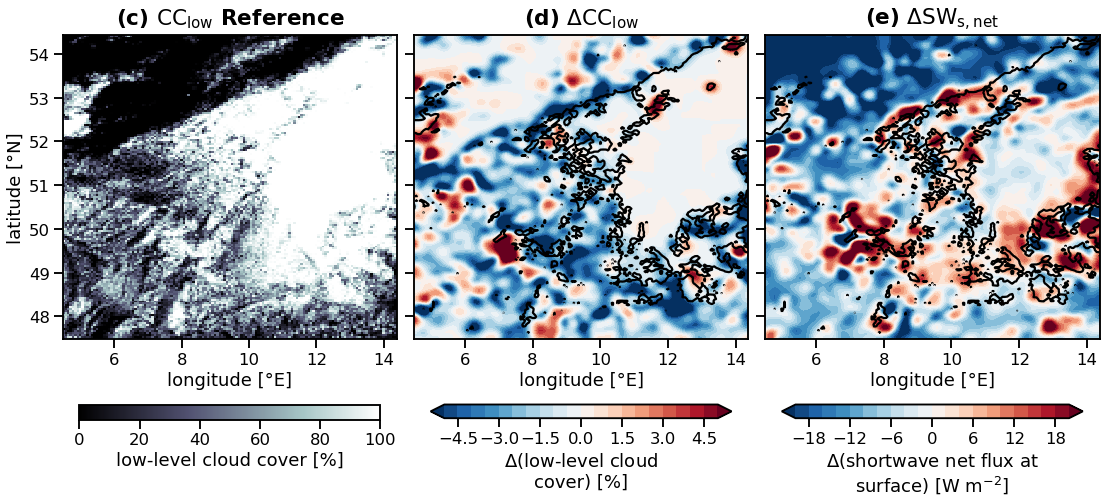

In [37]:
fig, axs = plt.subplots( ncols = 3, figsize = (18, 8), sharey = True )
plt.subplots_adjust( wspace = 0.05, left = 0.1, right = 0.9, )

plot_ref_or_diff( axs[0], dset, 'clcl' , cmap = plt.cm.bone, )
axs[0].set_title(r'(c) $\mathrm{CC_{low}}$ Reference', **title_kws )

plot_ref_or_diff( axs[1], dset, 'clcl' , diff_vmax = 5, sigma_smooth = 2., plot_ref = False)
axs[1].set_title(r'(d) $\Delta\mathrm{CC_{low}}$', **title_kws)
axs[1].set_ylabel('')

plot_ref_or_diff( axs[2], dset, 'sob_s' , diff_vmax = 20, sigma_smooth = 2., plot_ref = False)
axs[2].set_title(r'(e) $\Delta\mathrm{SW_{ s,\mathrm{net} }}$', **title_kws)
axs[2].set_ylabel('')

# plt.savefig( '../pics/cc-sob_fields_11z.png', dpi = 300. )

plot_range = [*plt.xlim(), *plt.ylim()]

### Plot with Coastlines and Country Borders 

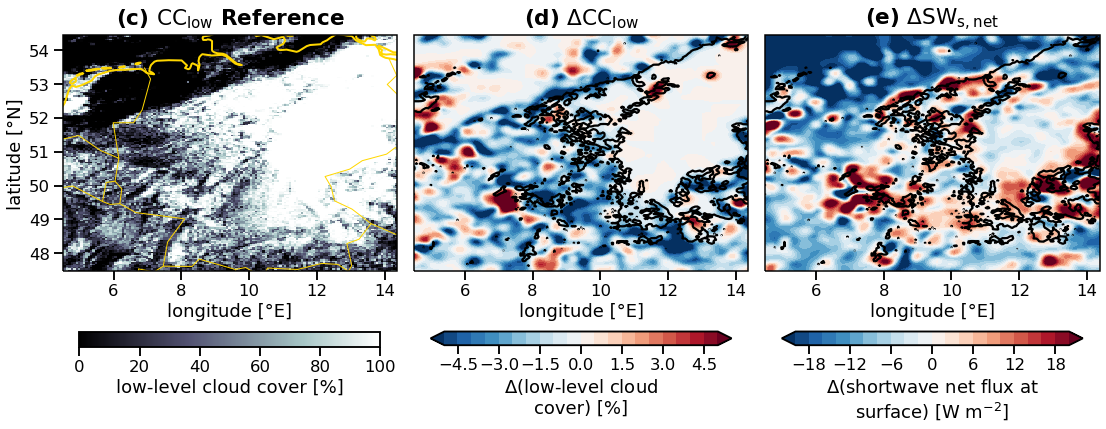

In [39]:
import cartopy.crs as ccrs
import cartopy.feature

fig = plt.figure(  figsize = (18, 7) )

axs = []
for i in range(3):
    axs += [plt.subplot(1,3,i+1, projection=ccrs.PlateCarree()) ,]
    axs[i].set_extent( plot_range )

#fig, axs = plt.subplots( ncols = 3,sharey = True,)# 

kws = dict(  transform = ccrs.PlateCarree(),
             subplot_kws = {"projection": ccrs.PlateCarree(),} )

p = plot_ref_or_diff( axs[0], dset, 'clcl' , cmap = plt.cm.bone, **kws)
p.axes.coastlines(resolution='50m', color='gold', linewidth = 2)
axs[0].add_feature(cartopy.feature.BORDERS, edgecolor='gold', linewidth = 1)
    
axs[0].set_title(r'(c) $\mathrm{CC_{low}}$ Reference', **title_kws )

plot_ref_or_diff( axs[1], dset, 'clcl' , diff_vmax = 5, sigma_smooth = 2., plot_ref = False)
axs[1].set_title(r'(d) $\Delta\mathrm{CC_{low}}$', **title_kws)
axs[1].set_ylabel('')

plot_ref_or_diff( axs[2], dset, 'sob_s' , diff_vmax = 20, sigma_smooth = 2., plot_ref = False)
axs[2].set_title(r'(e) $\Delta\mathrm{SW_{ s,\mathrm{net}}}$', **title_kws)
axs[2].set_ylabel('')

for i in range(3):
    axs[i].set_xticks([6, 8, 10, 12, 14])
axs[0].set_yticks(range(48,55))

plt.subplots_adjust( wspace = 0.05, left = 0.1, right = 0.9, top = 0.95, bottom = 0.15 )


plt.savefig( '../pics/cc-sob_fields_11z.png', dpi = 300. )